## This script is used to visualize the results from PEST++IES

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
outpath = '../../output/work_run_0524/'
fig_path = '../../output/figs/'
for n in range(10, 11):
    par_temp = pd.read_csv(f'{outpath}126001A.{n}.par.csv', index_col = 'real_name')
    obs_temp = pd.read_csv(f'{outpath}126001A.{n}.obs.csv', index_col = 'real_name')
    try:
        pars = pd.concat([pars, par_temp])
        obs = pd.concat([obs, obs_temp])
    except NameError:
        pars = pd.read_csv(f'{outpath}126001A.{n}.par.csv', index_col = 'real_name')
        obs = pd.read_csv(f'{outpath}126001A.{n}.obs.csv', index_col = 'real_name')
phi_group = pd.read_csv(f'{outpath}126001A.phi.group.csv')
pars.shape 

(100, 196)

In [3]:
# transform parameters into the original ranges
# read files containing parameter ranges
par_range = pd.read_csv(f'{outpath}parameters.tpl', skiprows=1, index_col = 'parameter')
for col in list(par_range.index):
    val_low, val_up = par_range.loc[col, 'lower'], par_range.loc[col, 'upper']
    pars[col.lower()] = pars[col.lower()]*(val_up - val_low) / 100 + val_low
# pars.head()
# par_range.head()

In [4]:
# calculate the errors for each parameter ensemble
pars['din_pbias'] = obs['din_pbias'].values
pars['lsq_annual'] = phi_group[phi_group['iteration']==n]['din'].values
# pars['drf'] = pars['drf'] * pars['lcf']
# pars['drp'] = pars['drp'] * pars['lcf']
# pars['lcf'] = 1

In [5]:
# select the parameter columns to plot
joint_columns = [*pars.columns[:3], *pars.columns[-2:]]
# pars = pars[(pars.din_pbias>-25) and (pars.din_pbias<25)]

<Figure size 720x720 with 0 Axes>

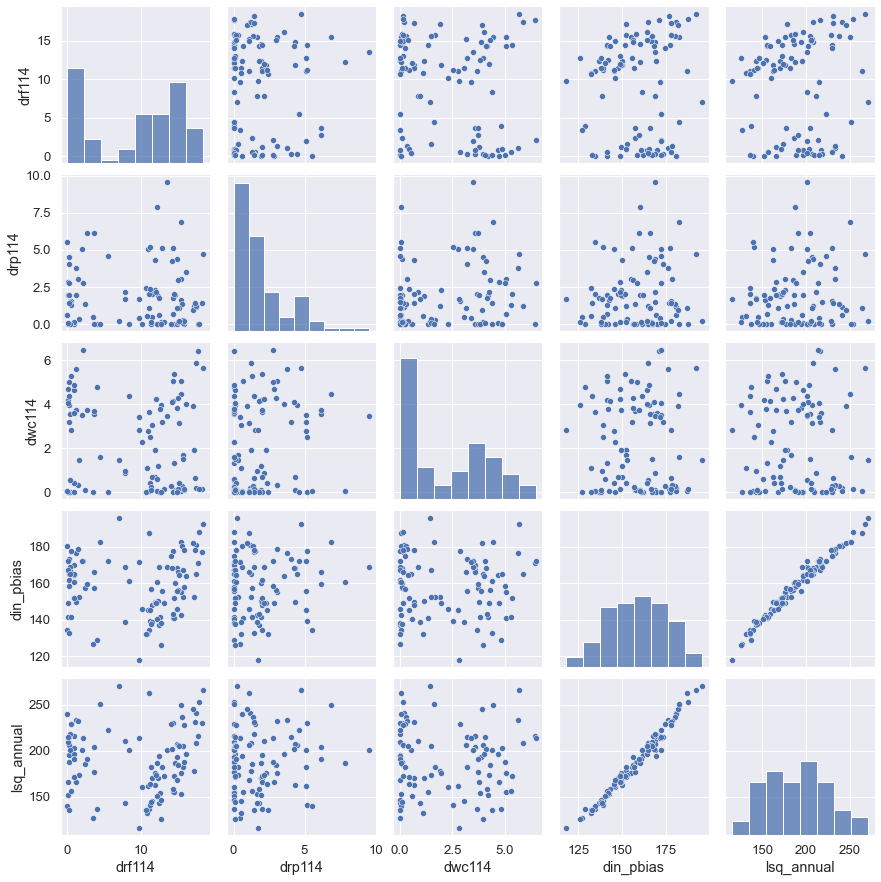

In [7]:
# plot the realizations of parameter ensemble
fig = plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)
ax = sns.pairplot(pars[joint_columns],kind='scatter',diag_kind='hist')
plt.savefig(f'{fig_path}all_pars_pairplot_run_0520.png', format='png', dpi=300)